In [3]:
import numpy as np 
import pandas as pd  
import cv2
import random
from tqdm import tqdm
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import ImageDataGenerator


In [4]:
df = pd.read_csv('/Users/michalkielkowski/Desktop/infa-all/magisterka/infa_kognitywan/Ocular_Disease_Recognition/data/archive (1)/full_df.csv')

In [5]:
df

,ID,Patient Age,Patient Sex,Left-Fundus,Right-Fundus,Left-Diagnostic Keywords,Right-Diagnostic Keywords,N,D,G,C,A,H,M,O,filepath,labels,target,filename
0,0,69,Female,0_left.jpg,0_right.jpg,cataract,normal fundus,0,0,0,1,0,0,0,0,../input/ocular-disease-recognition-odir5k/ODI...,['N'],"[1, 0, 0, 0, 0, 0, 0, 0]",0_right.jpg
1,1,57,Male,1_left.jpg,1_right.jpg,normal fundus,normal fundus,1,0,0,0,0,0,0,0,../input/ocular-disease-recognition-odir5k/ODI...,['N'],"[1, 0, 0, 0, 0, 0, 0, 0]",1_right.jpg
2,2,42,Male,2_left.jpg,2_right.jpg,laser spot，moderate non proliferative retinopathy,moderate non proliferative retinopathy,0,1,0,0,0,0,0,1,../input/ocular-disease-recognition-odir5k/ODI...,['D'],"[0, 1, 0, 0, 0, 0, 0, 0]",2_right.jpg
3,4,53,Male,4_left.jpg,4_right.jpg,macular epiretinal membrane,mild nonproliferative retinopathy,0,1,0,0,0,0,0,1,../input/ocular-disease-recognition-odir5k/ODI...,['D'],"[0, 1, 0, 0, 0, 0, 0, 0]",4_right.jpg
4,5,50,Female,5_left.jpg,5_right.jpg,moderate non proliferative retinopathy,moderate non proliferative retinopathy,0,1,0,0,0,0,0,0,../input/ocular-disease-recognition-odir5k/ODI...,['D'],"[0, 1, 0, 0, 0, 0, 0, 0]",5_right.jpg
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6387,4686,63,Male,4686_left.jpg,4686_right.jpg,severe nonproliferative retinopathy,proliferative diabetic retinopathy,0,1,0,0,0,0,0,0,../input/ocular-disease-recognition-odir5k/ODI...,['D'],"[0, 1, 0, 0, 0, 0, 0, 0]",4686_left.jpg
6388,4688,42,Male,4688_left.jpg,4688_right.jpg,moderate non proliferative retinopathy,moderate non proliferative retinopathy,0,1,0,0,0,0,0,0,../input/ocular-disease-recognition-odir5k/ODI...,['D'],"[0, 1, 0, 0, 0, 0, 0, 0]",4688_left.jpg
6389,4689,54,Male,4689_left.jpg,4689_right.jpg,mild nonproliferative retinopathy,normal fundus,0,1,0,0,0,0,0,0,../input/ocular-disease-recognition-odir5k/ODI...,['D'],"[0, 1, 0, 0, 0, 0, 0, 0]",4689_left.jpg
6390,4690,57,Male,4690_left.jpg,4690_right.jpg,mild nonproliferative retinopathy,mild nonproliferative retinopathy,0,1,0,0,0,0,0,0,../input/ocular-disease-recognition-odir5k/ODI...,['D'],"[0, 1, 0, 0, 0, 0, 0, 0]",4690_left.jpg


In [6]:
# left_no_normal = df.loc[(df.C ==0) & (df["Left-Diagnostic Keywords"] == "atrophy")]["Left-Fundus"].sample(250,random_state=42).values
left_glaucoma = df.loc[(df.G ==1) & (df["Left-Diagnostic Keywords"] == "glaucoma")]["Left-Fundus"].values

# right_no_normal = df.loc[(df.C ==0) & (df["Right-Diagnostic Keywords"] == "atrophy")]["Right-Fundus"].sample(250,random_state=42).values
right_glaucoma = df.loc[(df.G ==1) & (df["Right-Diagnostic Keywords"] == "glaucoma")]["Right-Fundus"].values
right_glaucoma[:15]


array(['167_right.jpg', '583_right.jpg', '1209_right.jpg',
       '1210_right.jpg', '1212_right.jpg', '1214_right.jpg',
       '1215_right.jpg', '1216_right.jpg', '1217_right.jpg',
       '1218_right.jpg', '1220_right.jpg', '1222_right.jpg',
       '1226_right.jpg', '1227_right.jpg', '1229_right.jpg'], dtype=object)

In [7]:
print("Number of images in left cataract: {}".format(len(left_glaucoma)))
print("Number of images in right cataract: {}".format(len(right_glaucoma)))

Number of images in left cataract: 207
Number of images in right cataract: 190


In [8]:
left_normal = df.loc[(df.G ==0) & (df["Left-Diagnostic Keywords"] == "normal fundus")]["Left-Fundus"].sample(250,random_state=42).values
right_normal = df.loc[(df.G ==0) & (df["Right-Diagnostic Keywords"] == "normal fundus")]["Right-Fundus"].sample(250,random_state=42).values
right_normal[:15]

# try to add here more codntions for the normal dataset to be absuolutely diffrent so it doesnt have any other diesies or maybe by default if normal then don t have any other diseses check
# jakby mi nie wychodziło to moge usunąc te sample i dać mu więcej danych 

array(['3343_right.jpg', '906_right.jpg', '3406_right.jpg',
       '2974_right.jpg', '3373_right.jpg', '3373_right.jpg',
       '2446_right.jpg', '2967_right.jpg', '3197_right.jpg',
       '2496_right.jpg', '3253_right.jpg', '2916_right.jpg',
       '2610_right.jpg', '2887_right.jpg', '363_right.jpg'], dtype=object)

In [9]:
glaucoma = np.concatenate((left_glaucoma,right_glaucoma),axis=0)
normal = np.concatenate((left_normal,right_normal),axis=0)

In [10]:
print(len(normal),len(glaucoma))


500 397


In [11]:
from tensorflow.keras.preprocessing.image import load_img,img_to_array
dataset_dir = "/Users/michalkielkowski/Desktop/infa-all/magisterka/infa_kognitywan/Ocular_Disease_Recognition/data/archive (1)/preprocessed_images/"

# możliwe bardzo że tutaj maja byc training images bo tak tez jest w csv sprawdz to ok it looks like these are the same images but just prepocessed 


image_size=224
labels = []
dataset = []
def create_dataset(image_category,label):
    for img in tqdm(image_category):
        image_path = os.path.join(dataset_dir,img)
        try:
            image = cv2.imread(image_path,cv2.IMREAD_COLOR)
            image = cv2.resize(image,(image_size,image_size))
        except:
            continue
        
        dataset.append([np.array(image),np.array(label)])
    random.shuffle(dataset)
    return dataset
        


In [12]:
import os

dataset = create_dataset(glaucoma,1)


100%|██████████| 397/397 [00:01<00:00, 229.87it/s]


In [13]:
len(dataset)


397

In [14]:
dataset = create_dataset(normal,0)


100%|██████████| 500/500 [00:02<00:00, 194.67it/s]


In [15]:
len(dataset)


897

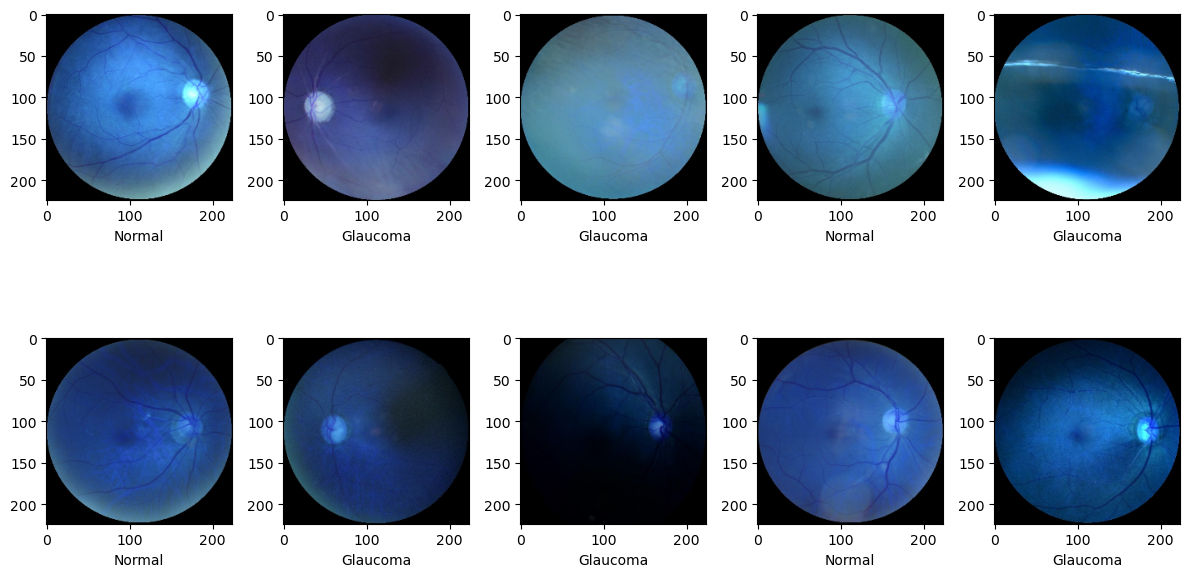

In [16]:
plt.figure(figsize=(12,7))
for i in range(10):
    sample = random.choice(range(len(dataset)))
    image = dataset[sample][0]
    category = dataset[sample][1]
    if category== 0:
        label = "Normal"
    else:
        label = "Glaucoma"
    plt.subplot(2,5,i+1)
    plt.imshow(image)
    plt.xlabel(label)
plt.tight_layout() 

In [17]:
x = np.array([i[0] for i in dataset]).reshape(-1,image_size,image_size,3)
y = np.array([i[1] for i in dataset])

In [18]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2)


In [19]:
from tensorflow.keras.applications.vgg19 import VGG19
vgg = VGG19(weights="imagenet",include_top = False,input_shape=(image_size,image_size,3))


In [20]:
for layer in vgg.layers:
    layer.trainable = False


In [21]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Flatten,Dense
model = Sequential()
model.add(vgg)
model.add(Flatten())
model.add(Dense(1,activation="sigmoid"))


In [22]:
model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg19 (Functional)          (None, 7, 7, 512)         20024384  
                                                                 
 flatten (Flatten)           (None, 25088)             0         
                                                                 
 dense (Dense)               (None, 1)                 25089     
                                                                 
Total params: 20049473 (76.48 MB)
Trainable params: 25089 (98.00 KB)
Non-trainable params: 20024384 (76.39 MB)
_________________________________________________________________


In [23]:
model.compile(optimizer="adam",loss="binary_crossentropy",metrics=["accuracy"])


In [24]:
from tensorflow.keras.callbacks import ModelCheckpoint,EarlyStopping
checkpoint = ModelCheckpoint("vgg19.h5",monitor="val_acc",verbose=1,save_best_only=True,
                             save_weights_only=False,save_freq=1)
earlystop = EarlyStopping(monitor="val_acc",patience=5,verbose=1)

In [25]:
history = model.fit(x_train,y_train,batch_size=32,epochs=15,validation_data=(x_test,y_test),
                    verbose=1,callbacks=[checkpoint,earlystop])

Epoch 1/15
23/23 [==============================] - 441s 19s/step - loss: 3.7544 - accuracy: 0.6388 - val_loss: 1.9588 - val_accuracy: 0.7278
Epoch 2/15
23/23 [==============================] - 2274s 103s/step - loss: 0.9155 - accuracy: 0.8633 - val_loss: 1.7888 - val_accuracy: 0.7000
Epoch 3/15
23/23 [==============================] - 2165s 49s/step - loss: 0.2713 - accuracy: 0.9344 - val_loss: 1.2369 - val_accuracy: 0.7889
Epoch 4/15
23/23 [==============================] - 1212s 53s/step - loss: 0.0827 - accuracy: 0.9763 - val_loss: 1.2626 - val_accuracy: 0.8222
Epoch 5/15
23/23 [==============================] - 1551s 69s/step - loss: 0.0274 - accuracy: 0.9902 - val_loss: 1.1914 - val_accuracy: 0.8389
Epoch 6/15
23/23 [==============================] - 9755s 440s/step - loss: 0.0052 - accuracy: 1.0000 - val_loss: 1.1989 - val_accuracy: 0.8278
Epoch 7/15
23/23 [==============================] - 4849s 219s/step - loss: 9.7322e-04 - accuracy: 1.0000 - val_loss: 1.1644 - val_accuracy: 

In [26]:
loss,accuracy = model.evaluate(x_test,y_test)
print("loss:",loss)
print("Accuracy:",accuracy)

6/6 [==============================] - 66s 11s/step - loss: 1.1929 - accuracy: 0.8333
loss: 1.1929079294204712
Accuracy: 0.8333333134651184


In [27]:
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score

# y_pred = model.predict_classes(x_test) change in tenserflow 

predict_x=model.predict(x_test) 
y_pred=np.argmax(predict_x,axis=1)


6/6 [==============================] - 61s 10s/step


In [28]:
accuracy_score(y_test,y_pred)


0.5611111111111111

In [29]:
print(classification_report(y_test,y_pred))


              precision    recall  f1-score   support

           0       0.56      1.00      0.72       101
           1       0.00      0.00      0.00        79

    accuracy                           0.56       180
   macro avg       0.28      0.50      0.36       180
weighted avg       0.31      0.56      0.40       180



/opt/anaconda3/envs/eksploracja_danych/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/anaconda3/envs/eksploracja_danych/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/anaconda3/envs/eksploracja_danych/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_

In [30]:
from mlxtend.plotting import plot_confusion_matrix
cm = confusion_matrix(y_test,y_pred)
plot_confusion_matrix(conf_mat = cm,figsize=(8,7),class_names = ["Normal","Glaucoma"],
                      show_normed = True);


ModuleNotFoundError: No module named 'mlxtend'

In [ ]:
plt.style.use("ggplot")
fig = plt.figure(figsize=(12,6))
epochs = range(1,16)
plt.subplot(1,2,1)
plt.plot(epochs,history.history["accuracy"],"go-")
plt.plot(epochs,history.history["val_accuracy"],"ro-")
plt.title("Model Accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend(["Train","val"],loc = "upper left")

plt.subplot(1,2,2)
plt.plot(epochs,history.history["loss"],"go-")
plt.plot(epochs,history.history["val_loss"],"ro-")
plt.title("Model Loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend(["Train","val"],loc = "upper left")
plt.show()


In [ ]:
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score
y_pred = model.predict_classes(x_test)

In [ ]:
accuracy_score(y_test,y_pred)


In [ ]:
print(classification_report(y_test,y_pred))


In [ ]:
from mlxtend.plotting import plot_confusion_matrix
cm = confusion_matrix(y_test,y_pred)
plot_confusion_matrix(conf_mat = cm,figsize=(8,7),class_names = ["Normal","Cataract"],
                      show_normed = True);

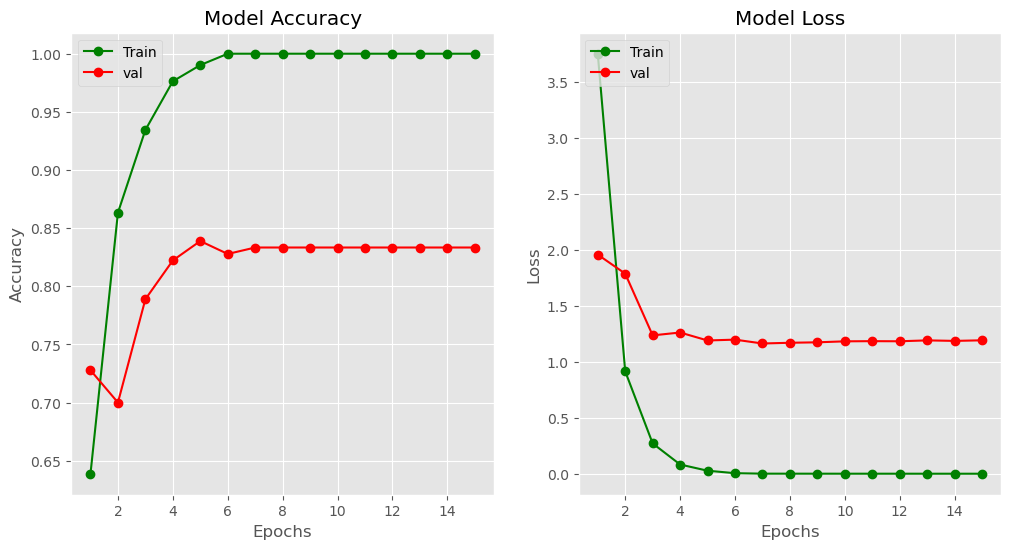

In [32]:
plt.style.use("ggplot")
fig = plt.figure(figsize=(12,6))
epochs = range(1,16)
plt.subplot(1,2,1)
plt.plot(epochs,history.history["accuracy"],"go-")
plt.plot(epochs,history.history["val_accuracy"],"ro-")
plt.title("Model Accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend(["Train","val"],loc = "upper left")

plt.subplot(1,2,2)
plt.plot(epochs,history.history["loss"],"go-")
plt.plot(epochs,history.history["val_loss"],"ro-")
plt.title("Model Loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend(["Train","val"],loc = "upper left")
plt.show()


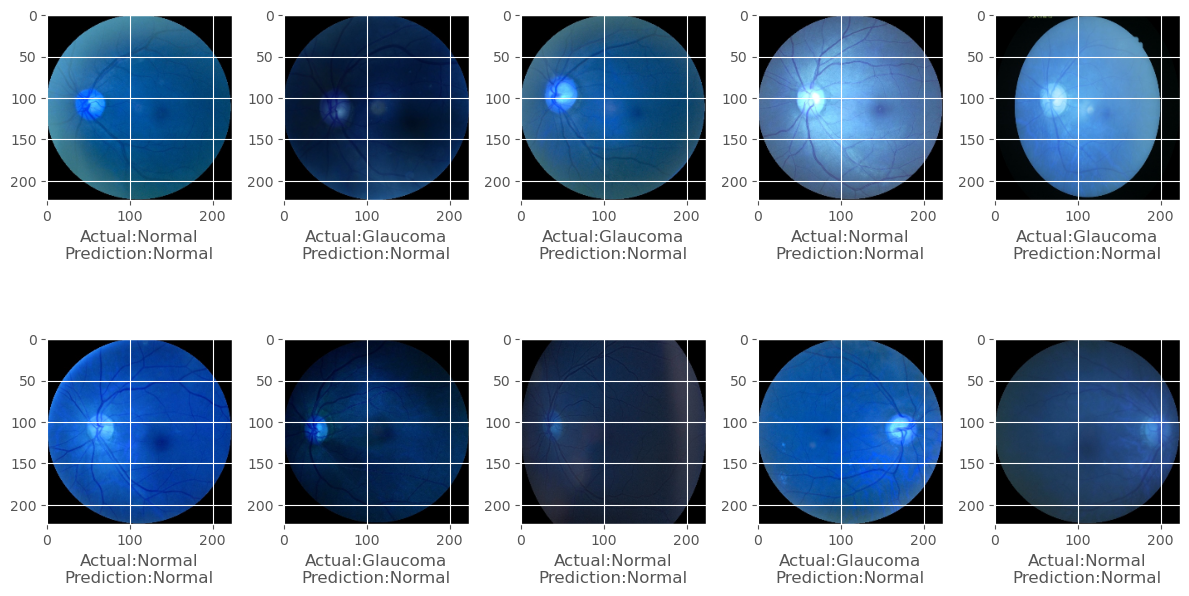

In [35]:
plt.figure(figsize=(12,7))
for i in range(10):
    sample = random.choice(range(len(x_test)))
    image = x_test[sample]
    category = y_test[sample]
    pred_category = y_pred[sample]
    
    if category== 0:
        label = "Normal"
    else:
        label = "Glaucoma"
        
    if pred_category== 0:
        pred_label = "Normal"
    else:
        pred_label = "Glaucoma"
        
    plt.subplot(2,5,i+1)
    plt.imshow(image)
    plt.xlabel("Actual:{}\nPrediction:{}".format(label,pred_label))
plt.tight_layout() 

/opt/anaconda3/envs/eksploracja_danych/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Confusion Matrix:
[[101   0]
 [ 79   0]]
Precision: 0.0
Recall: 0.0
F1 Score: 0.0


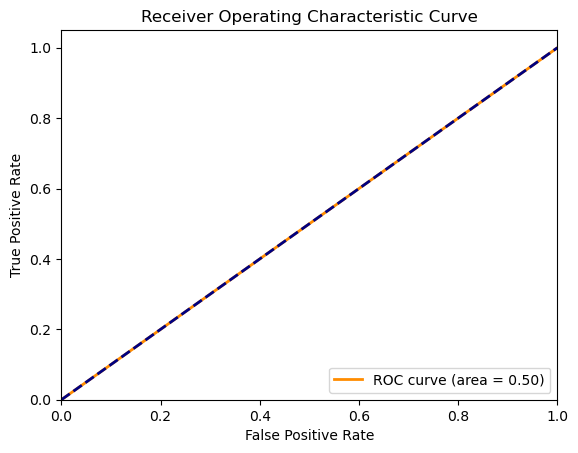

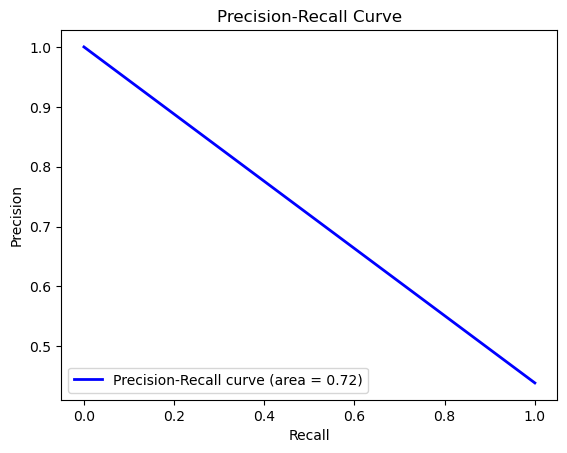

In [31]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score, roc_curve, precision_recall_curve, auc

# Assuming you have your model predictions (y_pred) and true labels (y_test)
# Calculate confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Calculate precision, recall, and F1 score
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print("Confusion Matrix:")
print(cm)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)

# Plot ROC curve
fpr, tpr, _ = roc_curve(y_test, y_pred)
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic Curve')
plt.legend(loc="lower right")
plt.show()

# Plot precision-recall curve
precision, recall, _ = precision_recall_curve(y_test, y_pred)
pr_auc = auc(recall, precision)

plt.figure()
plt.plot(recall, precision, color='blue', lw=2, label='Precision-Recall curve (area = %0.2f)' % pr_auc)
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend(loc="lower left")
plt.show()


In [34]:
model.save('/Users/michalkielkowski/Desktop/infa-all/magisterka/infa_kognitywan/Ocular_Disease_Recognition/models/glaucoma.h5')  # Replace '/path/to/save/model.h5' with your desired file path


/opt/anaconda3/envs/eksploracja_danych/lib/python3.11/site-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(
